# Preliminary Analysis of Gender Participation in AAS Talks

Initial analysis led by Brett Morris and Jim Davenport.

In [25]:
%pylab inline
from urllib.request import urlopen
import datetime
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 15
from matplotlib import pyplot as plt

stableURL = 'https://raw.githubusercontent.com/jradavenport/aas225-gender/master/data.csv'
raw = urlopen(stableURL).read().splitlines()

num = []
time = []
sid = []
speaker = []
qs = []
comments = []

for i in range(len(raw)):
    splitline = str(raw[i]).split(';')[0].split(',')
    splitline = [j for j in splitline if j != ' ' and j != '']
    
    # If all columns filled and there is only one entry (M, F) for speaker gender:
    if len(splitline) >= 5 and len(splitline[3]) == 1 and ('M' in splitline[4].upper() or 'F' in splitline[4].upper()):
        iscleansid = splitline[2].replace('.', '').isdigit()
        if iscleansid:
            # Fix sid if necessary
            if len(splitline[2]) != 6:
                splitsid = splitline[2].split('.')
                splitline[2] = '.'.join([splitsid[0], splitsid[1].zfill(2)])
            
            # If this talk ID has not been added:
            if splitline[2] not in sid:
                num.append(splitline[0])
                time.append(splitline[1])
                sid.append(splitline[2])
                speaker.append(splitline[3].upper())
                qs.append(splitline[4].upper())
                comments.append(','.join(splitline[5:]))
            
            # If this talk ID has been added already:
            if splitline[2] in sid:
                # Check if the number of questions in new entry is longer. 
                # If so, replace earlier entry with the longer one.
                if len(qs[sid.index(splitline[2])]) < len(splitline[4].upper()):
                    replaceindex = sid.index(splitline[2])
                    num[replaceindex] = splitline[0]
                    time[replaceindex] = splitline[1]
                    sid[replaceindex] = splitline[2]
                    speaker[replaceindex] = splitline[3].upper()
                    qs[replaceindex] = splitline[4].upper()
                    comments[replaceindex] = ','.join(splitline[5:])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Overall demographics

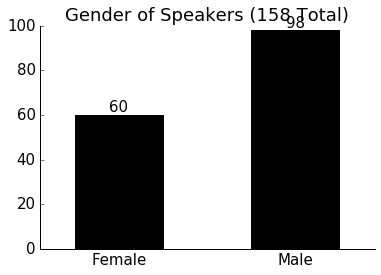

Male speakers/All speakers= 62.0%
Female speakers/All speakers = 38.0%


In [26]:
def annotateformat(number):
    if number < 1:
        return '%.2f' % number
    else: 
        return '%d' % number

def nicehist(axis, female, male, title):
    axis.bar([0, 1], [female, male], color='k', width=0.5)
    axis.set_xticklabels(['Female', 'Male'])
    axis.set_xticks([0.25, 1.25])
    axis.set_xlim([-0.2, 1.7])
    
    axis.annotate(annotateformat(female), xy=(0.25, female), va='bottom', ha='center')
    axis.annotate(annotateformat(male), xy=(1.25, male), va='bottom', ha='center')
    axis.set_title(title)    
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')
    axis.xaxis.set_ticks_position('bottom')
    axis.yaxis.set_ticks_position('left')

Nfemalespeakers = len([i for i in speaker if i == 'F'])
Nmalespeakers = len([i for i in speaker if i == 'M'])

fig, ax = plt.subplots(1)
nicehist(ax, Nfemalespeakers, Nmalespeakers, 
         'Gender of Speakers ({0} Total)'.format(Nfemalespeakers+Nmalespeakers))
plt.show()

print('Male speakers/All speakers= {0:.1f}%'
      .format(100*float(Nmalespeakers)/(Nfemalespeakers + Nmalespeakers)))
print('Female speakers/All speakers = {0:.1f}%'
      .format(100*float(Nfemalespeakers)/(Nfemalespeakers + Nmalespeakers)))

Male qs/All qs = 81.1%
Female qs/All qs = 18.9%


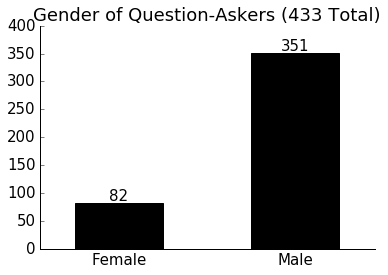

In [27]:
allqs = ''.join([i for i in qs if 'M' in i or 'F' in i])
Nfemaleqs = len([i for i in allqs if i == 'F'])
Nmaleqs = len([i for i in allqs if i == 'M'])
    
fig, ax = plt.subplots(1)
nicehist(ax, Nfemaleqs, Nmaleqs, 'Gender of Question-Askers (%d Total)' % (Nfemaleqs+Nmaleqs))

print('Male qs/All qs = {0:.1f}%'.format((100*float(Nmaleqs)/(Nfemaleqs + Nmaleqs))))
print('Female qs/All qs = {0:.1f}%'.format((100*float(Nfemaleqs)/(Nfemaleqs + Nmaleqs))))

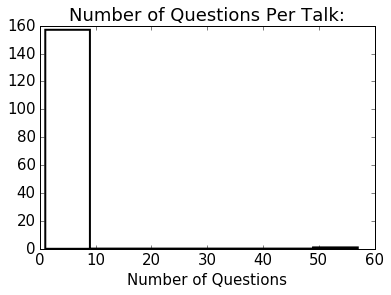

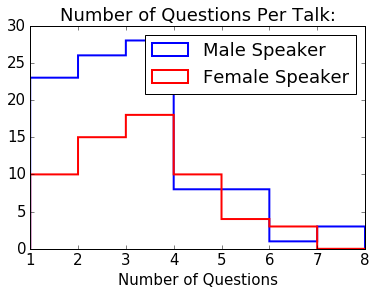

In [28]:
fig, ax = plt.subplots(1)
Nbins = 7

ax.hist([len(i) for i in qs], Nbins, histtype='stepfilled', color='w', lw=2)
ax.set_title('Number of Questions Per Talk:')
ax.set_xlabel('Number of Questions')
plt.show()

malespeaker_Nqs = [len(qs[i]) for i in range(len(num)) if speaker[i] == 'M']
femalespeaker_Nqs = [len(qs[i]) for i in range(len(num)) if speaker[i] == 'F']

fig, ax = plt.subplots(1)
ax.hist(malespeaker_Nqs, Nbins, histtype='step', color='b', lw=2, label='Male Speaker', range=[1,8])
ax.hist(femalespeaker_Nqs, Nbins, histtype='step', color='r', lw=2, label='Female Speaker', range=[1,8])
ax.set_title('Number of Questions Per Talk:')
ax.set_xlabel('Number of Questions')
ax.legend()
plt.show()

# Who asks questions first?

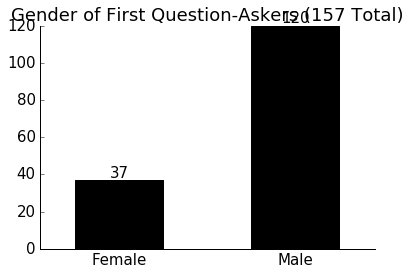

Male first qs/All qs = 76.4%
Female first qs/All qs = 23.6%


In [29]:
Nmalesfirst = len([i for i in qs if i[0] == 'M'])
Nfemalesfirst = len([i for i in qs if i[0] == 'F'])

fig, ax = plt.subplots(1)
nicehist(ax, Nfemalesfirst, Nmalesfirst, 
         'Gender of First Question-Askers ({0} Total)'.format(Nfemalesfirst+Nmalesfirst))
plt.show()



print('Male first qs/All qs = {0:.1f}%'.format((100*float(Nmalesfirst)/(Nfemalesfirst + Nmalesfirst))))
print('Female first qs/All qs = {0:.1f}%'.format((100*float(Nfemalesfirst)/(Nfemalesfirst + Nmalesfirst))))

## When males/females ask first Q, are subsequent Qs affected?

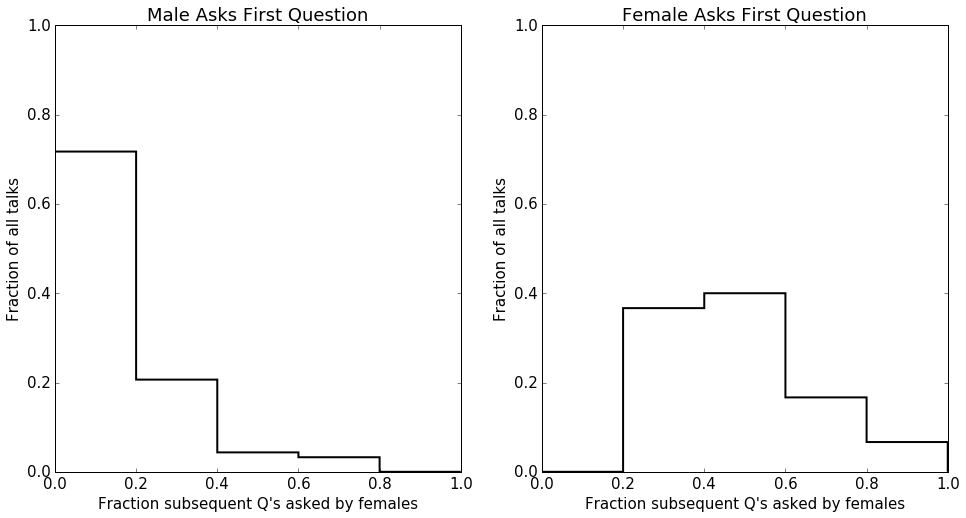

In [30]:
malesfirst = [i for i in qs if i[0] == 'M']
malesfirst_percentagefemaleafter = [float(i.count('F'))/len(i) for i in malesfirst[1:] \
                                    if len(i) >= 2]

femalesfirst = [i for i in qs if i[0] == 'F']
femalesfirst_percentagefemaleafter = [float(i.count('F'))/len(i) for i in femalesfirst[1:] 
                                      if len(i) >= 2]

fig, ax = plt.subplots(1, 2, figsize=(16,8))
Nbins = 5

ax[0].hist(malesfirst_percentagefemaleafter, Nbins, color='k', 
           range=[0,1], histtype='step', lw=2, 
           weights=len(malesfirst_percentagefemaleafter)*[1./len(malesfirst_percentagefemaleafter)])
ax[0].set_title('Male Asks First Question')

ax[1].hist(femalesfirst_percentagefemaleafter, Nbins, color='k', 
           range=[0,1], histtype='step', lw=2,
           weights=len(femalesfirst_percentagefemaleafter)*[1./len(femalesfirst_percentagefemaleafter)])

ax[1].set_title('Female Asks First Question')

for axes in ax:
    axes.set_xlim([0, 1])
    axes.set_xlabel("Fraction subsequent Q's asked by females")
    axes.set_ylabel("Fraction of all talks")
    axes.set_ylim([0, 1])
plt.show()

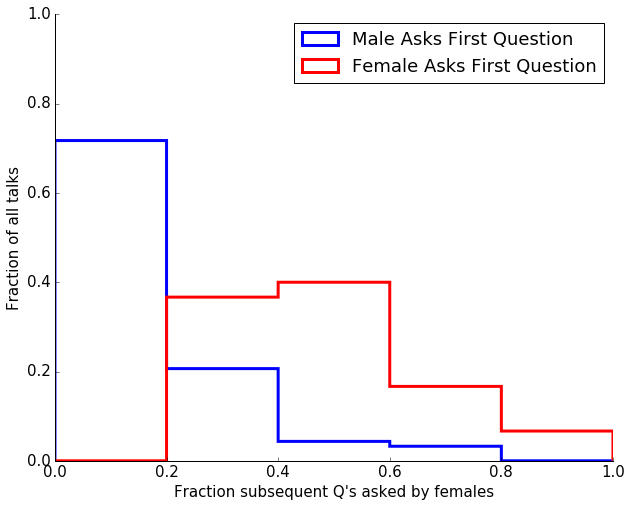

In [31]:
fig, ax = plt.subplots(1, figsize=(10,8))
Nbins = 5
ax.hist(malesfirst_percentagefemaleafter, Nbins, color='b', 
           range=[0,1], histtype='step', lw=3, 
           weights=len(malesfirst_percentagefemaleafter)*[1./len(malesfirst_percentagefemaleafter)],
           label='Male Asks First Question')

ax.hist(femalesfirst_percentagefemaleafter, Nbins, color='r', 
           range=[0,1], histtype='step', lw=3,
           weights=len(femalesfirst_percentagefemaleafter)*[1./len(femalesfirst_percentagefemaleafter)],
           label='Female Asks First Question')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel("Fraction subsequent Q's asked by females")
ax.set_ylabel("Fraction of all talks")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.legend()
plt.show()

## When M/F asks first Q, who asks following questions?

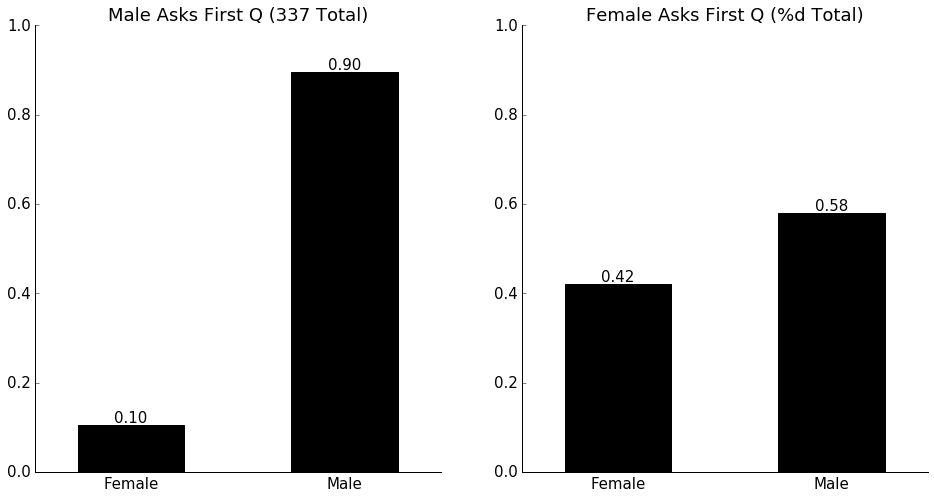

In [32]:
malesfirst_lenafter = float(len(''.join(malesfirst)))
malesfirst_Nfemaleafter = sum([i.count('F') for i in malesfirst[1:]
                                    if len(i) >= 2])/malesfirst_lenafter
femalesfirst_lenafter = float(len(''.join(femalesfirst)))
femalesfirst_Nfemaleafter = sum([i.count('F') for i in femalesfirst[1:]
                                      if len(i) >= 2])/femalesfirst_lenafter

fig, ax = plt.subplots(1, 2, figsize=(16,8))

nicehist(ax[0], malesfirst_Nfemaleafter, 1-malesfirst_Nfemaleafter,
         'Male Asks First Q ({0} Total)'.format(len(''.join(malesfirst))))

nicehist(ax[1], femalesfirst_Nfemaleafter, 1-femalesfirst_Nfemaleafter,
         'Female Asks First Q (%d Total)'.format(len(''.join(femalesfirst))))

for axes in ax:
    axes.set_ylim([0,1])

plt.show()

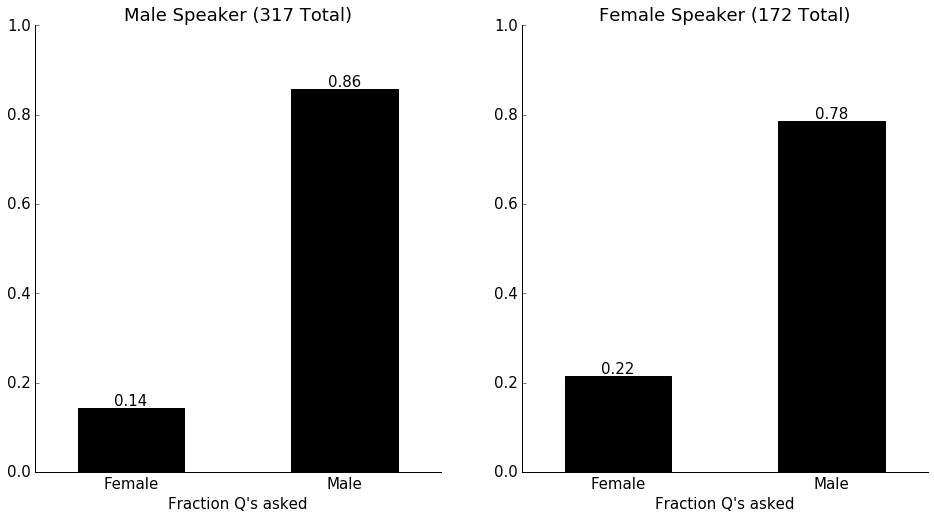

In [33]:
malespeaker_qs = [qs[i] for i in range(len(num)) if speaker[i] == 'M']
femalespeaker_qs = [qs[i] for i in range(len(num)) if speaker[i] == 'F']

malespeaker_Nfemaleqs = ''.join(malespeaker_qs).count('F')
malespeaker_Nquestions = len(''.join(malespeaker_qs))
malespeaker_percentagefemaleqs = malespeaker_Nfemaleqs/float(malespeaker_Nquestions)

femalespeaker_Nfemaleqs = ''.join(femalespeaker_qs).count('F')
femalespeaker_Nquestions = len(''.join(femalespeaker_qs))
femalespeaker_percentagefemaleqs = femalespeaker_Nfemaleqs/float(femalespeaker_Nquestions)

fig, ax = plt.subplots(1, 2, figsize=(16,8))

nicehist(ax[0], malespeaker_percentagefemaleqs, 1-malespeaker_percentagefemaleqs, 
         'Male Speaker ({0} Total)'.format(malespeaker_Nquestions))

nicehist(ax[1], femalespeaker_percentagefemaleqs, 1-femalespeaker_percentagefemaleqs,
          'Female Speaker ({0} Total)'.format(femalespeaker_Nquestions))
for axes in ax:
    axes.set_xlabel("Fraction Q's asked")
    axes.set_ylim([0,1])


plt.show()

## When is first question asked by female?

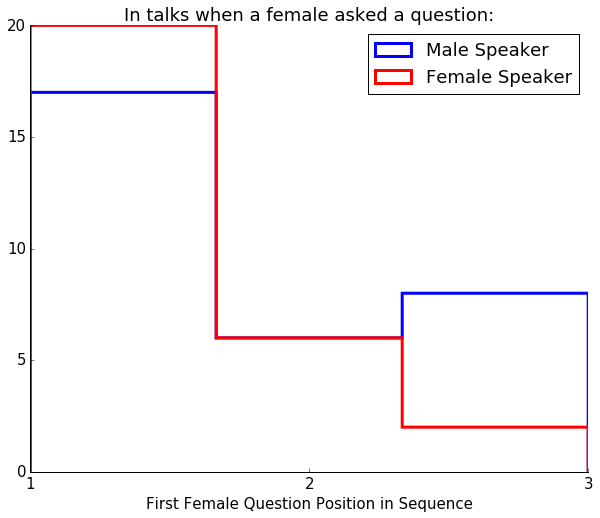

In [34]:
def getfirstindex(searchstring, letter):
    if letter in searchstring:
        return searchstring.index(letter) + 1
    return None
    
malespeaker_orderfemale = [getfirstindex(i, "F") for i in malespeaker_qs if 'F' in i]
femalespeaker_orderfemale = [getfirstindex(i, "F") for i in femalespeaker_qs if 'F' in i]

fig, ax = plt.subplots(1, figsize=(10,8))
Nbins = 3
ax.hist(malespeaker_orderfemale, Nbins, color='b', 
           range=[1,3], histtype='step', lw=3, 
           label='Male Speaker')

ax.hist(femalespeaker_orderfemale, Nbins, color='r', 
           range=[1,3], histtype='step', lw=3,
           label='Female Speaker')

ax.set_xlim([1, 3])
ax.set_xticks([1,2,3])
#ax.set_ylim([0, 1])
ax.set_xlabel("First Female Question Position in Sequence")
#ax.set_ylabel("Fraction of all talks")
ax.set_title('In talks when a female asked a question:')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.legend()
plt.show()

## # Qs asked versus % of Female Qs asked

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


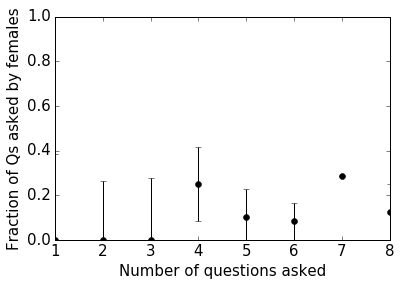

In [35]:
N_qs = np.array([len(i) for i in qs])
percentagefemaleqs = np.array([i.count('F')/float(len(i)) for i in qs])
order = np.argsort(N_qs)

#plt.plot(N_qs, percentagefemaleqs, '.')

for i in range(1, max(N_qs)):
    considertalks = i == N_qs
    medianpercentagefemaleqs = np.median(percentagefemaleqs[considertalks])
    stdpercentagefemaleqs = np.std(percentagefemaleqs[considertalks])
    plt.errorbar(i, medianpercentagefemaleqs, yerr=stdpercentagefemaleqs, fmt='o', color='k')
plt.ylim([0, 1.0])
plt.xlabel('Number of questions asked')
plt.ylabel('Fraction of Qs asked by females')
plt.show()

## Correlations by genre

In [36]:
infile = 'aas225-all-talks.txt'
raw = open(infile).read().splitlines()

rawchairgender = []
catagory = []
sessionID = []

for i,line in enumerate(raw):
    if i % 5 == 3:
        a, b, = line.split(',')
        catagory.append(a)
        rawchairgender.append(b.strip())
    if i % 5 == 0:
        sessionID.append(line[0:3])

rawchairgender = np.array(rawchairgender) 
sessionID = np.array(sessionID)
chair = []
for talknumber in sid:
    session = talknumber.split('.')[0]
    chair.append(rawchairgender[sessionID == session])

#Questions to ask the data: 
    
Show how reliable responses are by looking for simultaneous responses from individual talks?

Does the order of questions asked matter?

Are females more likely to ask follow-up questions rather than leading quetions?

Do women ask N questions proportionate to their size in the population?

If a woman asks a question, are others more likely to follow? Clustering?

Are the speaker genders similar in M/F to the overall population?

What are the biases in the talks that get survey responses?

Do people submit responses more often for talks given by women compared to the general pop?

How late in Q session is the first female Q?
